In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns
import os

In [4]:
#merging all data set

# Path to my folder of datasets
folder_path = "/Users/deen/Desktop/crime analysis/merging"

# Get list of all CSV files
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
data=pd.DataFrame(df)

# Preview the combined dataset
data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2024-09,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham 001A,Anti-social behaviour,NaN,NaN
1,7a8b7c7f0b8e6f113788e25ec5edf45268fd614ae70307...,2024-09,West Midlands Police,West Midlands Police,-1.849177,52.593202,On or near Russell Bank Road,E01009417,Birmingham 001A,Vehicle crime,Unable to prosecute suspect,NaN
2,620cd472328f788c78bb36d59e58a65fe3df5631692be7...,2024-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
3,242dabdcb663b6fc50b7a7cdb5a32c12c6b409fe7d8f1e...,2024-09,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Violence and sexual offences,Action to be taken by another organisation,NaN
4,482aa09a8759507ae8fc3ce5e2ae954bec63e0b7695f42...,2024-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1754398,e68ad5d824e086bed17047fce50e516cd9305f0a727903...,2022-05,West Midlands Police,West Midlands Police,-2.124530,52.581482,On or near Parking Area,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1754399,bf1b88c0e9408dfaef975c502f833975831223a898182e...,2022-05,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
1754400,0de2153fcd0a51682f1ebd31311f8e498606e65a0a2ec7...,2022-05,West Midlands Police,West Midlands Police,-2.124530,52.581482,On or near Parking Area,E01010530,Wolverhampton 035H,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1754401,1fe83e58727143c046d4e8244b3764907e09b2b259eed2...,2022-05,West Midlands Police,West Midlands Police,-2.120286,52.578475,On or near Maxwell Road,E01010530,Wolverhampton 035H,Other crime,Unable to prosecute suspect,NaN


In [6]:
#drop Nan column
dropped_column=data.drop(columns=['Context']) 

#selecting specific column 
Analysis_data=data[['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'Crime type', 'LSOA name', 'Last outcome category']]

# Sorting the columns by month
Analysis_data=Analysis_data.sort_values(by='Month')

#previewing sorted data
print(Analysis_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1754403 entries, 1286483 to 1015311
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Longitude              float64
 3   Latitude               float64
 4   Location               object 
 5   Crime type             object 
 6   LSOA name              object 
 7   Last outcome category  object 
dtypes: float64(2), object(6)
memory usage: 120.5+ MB
None


In [9]:
# Handling NaN values

print(Analysis_data.isna().sum()) #check the sum of null values

# Checking if any rows have no missing values
print("Rows with no missing values:", len(Analysis_data.dropna()))

#Removing nan values
Analysis_data=Analysis_data.dropna()
Analysis_data.info()



Crime ID                 0
Month                    0
Longitude                0
Latitude                 0
Location                 0
Crime type               0
LSOA name                0
Last outcome category    0
dtype: int64
Rows with no missing values: 1577438
<class 'pandas.core.frame.DataFrame'>
Index: 1577438 entries, 1286483 to 1015311
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype    
---  ------                 --------------    -----    
 0   Crime ID               1577438 non-null  object   
 1   Month                  1577438 non-null  period[M]
 2   Longitude              1577438 non-null  float64  
 3   Latitude               1577438 non-null  float64  
 4   Location               1577438 non-null  object   
 5   Crime type             1577438 non-null  object   
 6   LSOA name              1577438 non-null  object   
 7   Last outcome category  1577438 non-null  object   
dtypes: float64(2), object(5), period[M](1)
memory usage: 108

In [8]:
#handling datatypes 
Analysis_data['Month'] = pd.to_datetime(Analysis_data['Month'],format='%Y-%m').dt.to_period('M') #changing month to date format
print(Analysis_data.info())

#numerical statistcs
Analysis_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1577438 entries, 1286483 to 1015311
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype    
---  ------                 --------------    -----    
 0   Crime ID               1577438 non-null  object   
 1   Month                  1577438 non-null  period[M]
 2   Longitude              1577438 non-null  float64  
 3   Latitude               1577438 non-null  float64  
 4   Location               1577438 non-null  object   
 5   Crime type             1577438 non-null  object   
 6   LSOA name              1577438 non-null  object   
 7   Last outcome category  1577438 non-null  object   
dtypes: float64(2), object(5), period[M](1)
memory usage: 108.3+ MB
None


,Longitude,Latitude
count,1.577438e+06,1.577438e+06
mean,-1.899495e+00,5.249400e+01
std,1.796440e-01,7.006837e-02
min,-6.347315e+00,4.989215e+01
25%,-2.018990e+00,5.244642e+01
50%,-1.921140e+00,5.248623e+01
75%,-1.828583e+00,5.253874e+01
max,1.314886e+00,5.554113e+01


In [10]:
Analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577438 entries, 1286483 to 1015311
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype    
---  ------                 --------------    -----    
 0   Crime ID               1577438 non-null  object   
 1   Month                  1577438 non-null  period[M]
 2   Longitude              1577438 non-null  float64  
 3   Latitude               1577438 non-null  float64  
 4   Location               1577438 non-null  object   
 5   Crime type             1577438 non-null  object   
 6   LSOA name              1577438 non-null  object   
 7   Last outcome category  1577438 non-null  object   
dtypes: float64(2), object(5), period[M](1)
memory usage: 108.3+ MB


# Descriptive Analysis 

In [7]:
crime_count=Analysis_data['Crime type'].value_counts()
print(f'The crime counts are:\n {crime_count} \n')
print (f' The average crime count is: \n {crime_count.mean()}')

The crime counts are:
 Crime type
Violence and sexual offences    680499
Vehicle crime                   164369
Criminal damage and arson       132311
Public order                    121860
Other theft                     110199
Shoplifting                     103339
Burglary                        103180
Robbery                          40344
Drugs                            36252
Other crime                      30634
Possession of weapons            26868
Theft from the person            15911
Bicycle theft                    11672
Name: count, dtype: int64 

 The average crime count is: 
 121341.38461538461


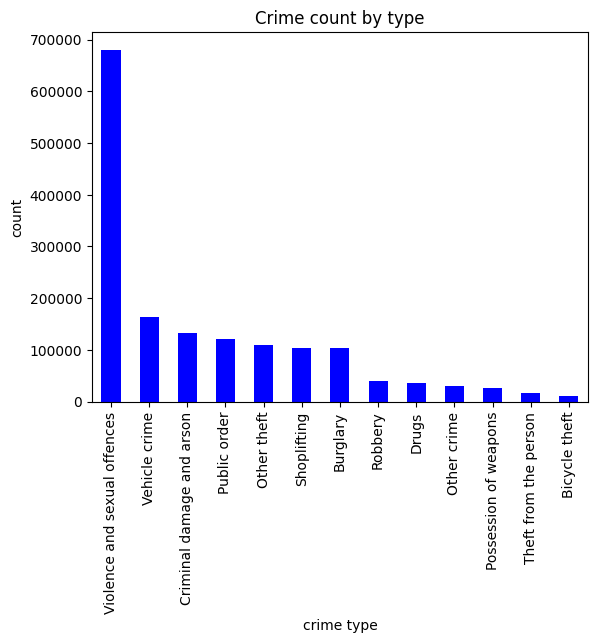

In [9]:
# Crime count by type
crime_count.plot(kind='bar', color='blue')
#visualizing the crime frequency
plt.title('Crime count by type')
plt.xlabel('crime type')
plt.ylabel('count')
plt.show()

In [30]:
# Extract year and month
Analysis_data['Year'] = Analysis_data['Month'].dt.year
Analysis_data['Month_Name'] = Analysis_data['Month'].dt.to_timestamp().dt.month_name()
# Crimes per year
yearly_counts = Analysis_data.groupby('Year').size()
print("\nCrimes per Year:\n", yearly_counts)

# Crimes per month (averaged across years)
monthly_counts = Analysis_data.groupby('Month_Name').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'])
print("\nCrimes by Month:\n", monthly_counts)


Crimes per Year:
 Year
2019    259680
2020    268083
2021    105833
2022    248714
2023    309408
2024    314006
2025     71714
dtype: int64

Crimes by Month:
 Month_Name
January      124822
February     140549
March        123495
April        147704
May          158478
June         130023
July         136305
August       129620
September    128027
October      133233
November     127178
December      98004
dtype: int64


In [11]:
outcome_counts = Analysis_data['Last outcome category'].value_counts()
print("\nOutcome Distribution:\n", outcome_counts)


Outcome Distribution:
 Last outcome category
Unable to prosecute suspect                            686590
Investigation complete; no suspect identified          644727
Status update unavailable                               72968
Court result unavailable                                68862
Local resolution                                        23506
Under investigation                                     21999
Action to be taken by another organisation              21668
Awaiting court outcome                                  16601
Offender given a caution                                 9755
Formal action is not in the public interest              2762
Further investigation is not in the public interest      2610
Offender given a drugs possession warning                1457
Further action is not in the public interest             1178
Suspect charged as part of another case                   686
Offender given community sentence                         465
Offender sent to prison 

In [19]:
#Spatial Statistics

# Mean coordinates (approximate geographic center of crimes)
mean_lat = Analysis_data['Latitude'].mean()
mean_lon = Analysis_data['Longitude'].mean()
print(f"Mean Latitude: {mean_lat:.4f}, Mean Longitude: {mean_lon:.4f}")

# Crime counts by location
location_counts = Analysis_data['Location'].value_counts()
print("\nTop 5 Locations by Crime Count:\n", location_counts.head())

#Crime Hotspots
hotspot_locations =location_counts.sort_values(ascending=False)
print("\nTop 10 Crime Hotspots:\n", hotspot_locations.head(10))

Mean Latitude: 52.4940, Mean Longitude: -1.8995

Top 5 Locations by Crime Count:
 Location
On or near Parking Area      47435
On or near Supermarket       45632
On or near                   37127
On or near Shopping Area     35695
On or near Petrol Station    32501
Name: count, dtype: int64

Top 10 Crime Hotspots:
 Location
On or near Parking Area              47435
On or near Supermarket               45632
On or near                           37127
On or near Shopping Area             35695
On or near Petrol Station            32501
On or near Sports/Recreation Area    15653
On or near Hospital                  10391
On or near Pedestrian Subway          8721
On or near Nightclub                  8329
On or near High Street                7636
Name: count, dtype: int64


In [13]:
#Temporal Analysis
yearly_trends = Analysis_data.groupby('Year')['Crime type'].value_counts().unstack().fillna(0)
print("\nCrime Types by Year:\n", yearly_trends)


Crime Types by Year:
 Crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
Year                                                                    
2019                 2466     24994                      24924   5643   
2020                 2225     19822                      21912   5757   
2021                  657      5390                       8812   2398   
2022                 1907     13886                      20318   5320   
2023                 2077     18466                      25058   6976   
2024                 1986     17146                      25614   7850   
2025                  354      3476                       5673   2308   

Crime type  Other crime  Other theft  Possession of weapons  Public order  \
Year                                                                        
2019               4302        20755                   3027         16954   
2020               5490        16707                   3257         23824   
2021       

In [31]:
#Monthly/Seasonal Patterns

def get_season(month):
    if month.month in [12, 1, 2]:
        return 'Winter'
    elif month.month in [3, 4, 5]:
        return 'Spring'
    elif month.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

Analysis_data['Season'] = Analysis_data['Month'].apply(get_season)
seasonal_counts = Analysis_data.groupby('Season').size()
print("\nCrimes by Season:\n", seasonal_counts)


Crimes by Season:
 Season
Fall      388438
Spring    429677
Summer    395948
Winter    363375
dtype: int64


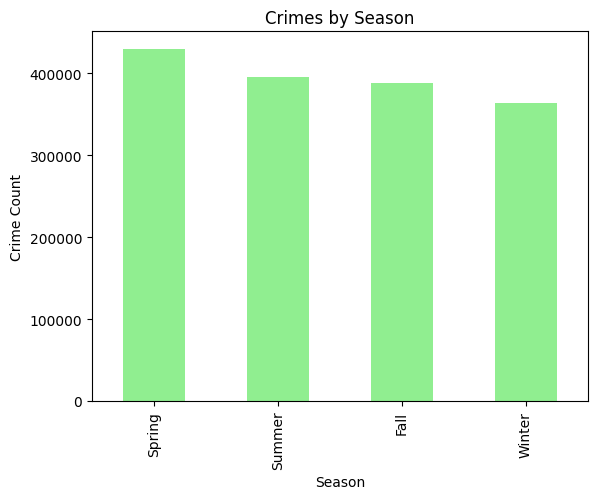

In [15]:
seasonal_counts.sort_values(ascending=False).plot(kind='bar', color='lightgreen').ascending=('False')
plt.title('Crimes by Season')
plt.xlabel('Season')
plt.ylabel('Crime Count')
plt.show()

<Axes: >

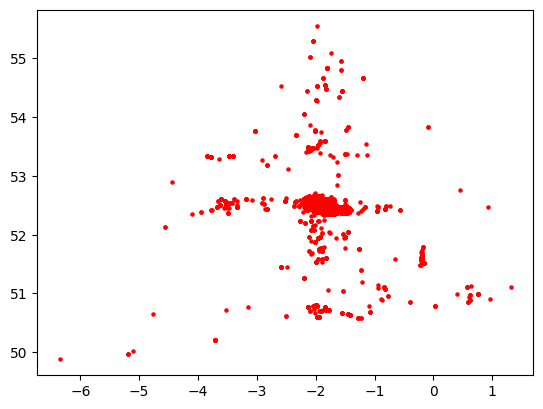

In [20]:
#Geographic Clustering
from shapely.geometry import Point
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(Analysis_data['Longitude'], Analysis_data['Latitude'])]
gdf = gpd.GeoDataFrame(Analysis_data, geometry=geometry)

# Plot crimes (basic example)
gdf.plot(marker='o', color='red', markersize=5)

In [42]:
#crime type analysis
top_crimes = Analysis_data['Crime type'].value_counts().head(5)
print("\nTop 5 Crime Types:\n", top_crimes)

#crime by time

month_order=['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']

# Convert Month_Name to categorical with specified order
Analysis_data['Month_Name'] = pd.Categorical(Analysis_data['Month_Name'], 
                                            categories=month_order, 
                                            ordered=True)
crime_by_month = Analysis_data.groupby(['Month_Name', 'Crime type'],observed=False).size().unstack().fillna(0)
print("\nCrime Types by Month:\n", crime_by_month)

#crime by season
crime_by_season = Analysis_data.groupby(['Season', 'Crime type']).size().unstack().fillna(0)
print("\nCrime Types by season:\n", crime_by_season)

seasonal_locations = Analysis_data.groupby(['Season','Location']).size().unstack().fillna(0)
print("\nCrime Types by season:\n", seasonal_locations)


Top 5 Crime Types:
 Crime type
Violence and sexual offences    680499
Vehicle crime                   164369
Criminal damage and arson       132311
Public order                    121860
Other theft                     110199
Name: count, dtype: int64

Crime Types by Month:
 Crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
Month_Name                                                              
January               692      9646                      10572   3086   
February              772      9702                       9837   3500   
March                 748      7912                      10488   2888   
April                1037      9371                      12658   3115   
May                  1249      9134                      13588   3658   
June                  936      7675                      11142   2856   
July                 1065      8013                      11870   2991   
August               1170      8297                      11421   2

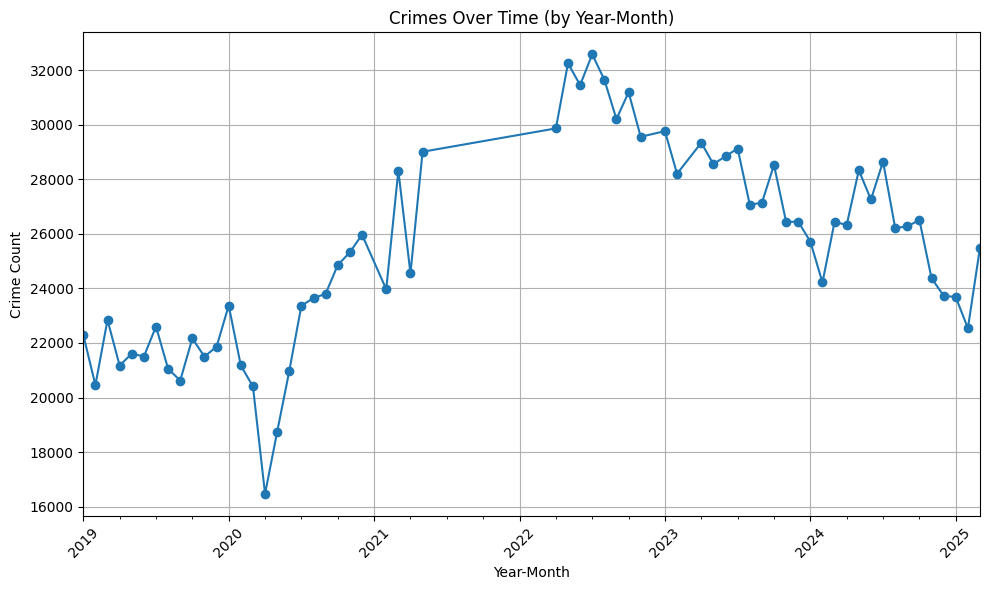

In [54]:
#Line Chart for Temporal Trends
crime_by_year_month = Analysis_data.groupby('Month').size()
# Crimes over time
crime_by_year_month.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Crimes Over Time (by Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Correlation between latitude and crime count (if aggregated)
print(Analysis_data[['Latitude', 'Longitude']].corr())


           Latitude  Longitude
Latitude   1.000000  -0.526486
Longitude -0.526486   1.000000


In [ ]:
# Crosstab for categorical variables
crime_location = pd.crosstab(Analysis_data['Crime type'].tail(), Analysis_data['Location'])
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Types by Location')
plt.show()